## [1.2.3] Simplified approximation for HO${_2}$ and CH${_3}$O${_2}$ radicals
Here we approximate the concentrations of HO₂ and CH₃O₂ just using linear regression model
###### Updated on 28 April 2025
##### Note: We tested on the selected representative regions for demonstration

In [98]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Arial']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
AUS = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_AUS(ver240113).dta')
BRA = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_BRA(ver240113).dta')
BTH = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_BTH(ver240113).dta')
CA = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_CA(ver240113).dta')
CCE = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_CCE(ver240113).dta')

COD = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_COD(ver240113).dta')
DEU = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_DEU(ver240113).dta')
FIN = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_FIN(ver240113).dta')
FRA = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_FRA(ver240113).dta')
GBA = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_GBA(ver240113).dta')

GBR = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_GBR(ver240113).dta')
IDN = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_IDN(ver240113).dta')
IL = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_IL(ver240113).dta')
IND = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_IND(ver240113).dta')
JPN = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_JPN(ver240113).dta')

KOR = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_KOR(ver240113).dta')
MYS = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_MYS(ver240113).dta')
NOR = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_NOR(ver240113).dta')
NY = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_NY(ver240113).dta')
NZL = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_NZL(ver240113).dta')

QTP = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_QTP(ver240113).dta')
SGP = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_SGP(ver240113).dta')
TO = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_TO(ver240113).dta')
VAN = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_VAN(ver240113).dta')
WA = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_WA(ver240113).dta')
YYN = pd.read_stata('/Users/csuen/Desktop/Sun-NG-24/radicals/representative regions/UKESM1-0-LL_2010_2014_YYN(ver240113).dta')

In [18]:
AUS['region'] = "AUS"
BRA['region'] = "BRA"
BTH['region'] = "BTH"
CA['region'] = "CA"
CCE['region'] = "CCE"

COD['region'] = "COD"
DEU['region'] = "DEU"
FIN['region'] = "FIN"
FRA['region'] = "FRA"
GBA['region'] = "GBA"

GBR['region'] = "GBR"
IDN['region'] = "IDN"
IL['region'] = "IL"
IND['region'] = "IND"
JPN['region'] = "JPN"

KOR['region'] = "KOR"
MYS['region'] = "MYS"
NOR['region'] = "NOR"
NY['region'] = "NY"
NZL['region'] = "NZL"

QTP['region'] = "QTP"
SGP['region'] = "SGP"
TO['region'] = "TO"
VAN['region'] = "VAN"
WA['region'] = "WA"
YYN['region'] = "YYN"

In [19]:
data = AUS.append(BRA).append(BTH).append(CA).append(CCE)
data = data.append(COD).append(DEU).append(FIN).append(FRA).append(GBA)
data = data.append(GBR).append(IDN).append(IL).append(IND).append(JPN)
data = data.append(KOR).append(MYS).append(NOR).append(NY).append(NZL)
data = data.append(QTP).append(SGP).append(TO).append(VAN).append(WA).append(YYN)

#### 1. L(CH${_4}$)/[NO] and CH${_3}$O${_2}$

In [22]:
data['lossch4_no'] = data['lossch4']/data['no']

In [39]:
lch4_no_region_mean = data.groupby(['region']).mean()['lossch4_no']
lch4_no_region_std = data.groupby(['region']).std()['lossch4_no']
lch4_no_region_ct = data.groupby(['region']).count()['lossch4_no']
lch4_no_region_ste = lch4_no_region_std/np.sqrt(lch4_no_region_ct/5)

ch3o2_region_mean = data.groupby(['region']).mean()['ch3o2_mole']
ch3o2_region_std = data.groupby(['region']).std()['ch3o2_mole']
ch3o2_region_ct = data.groupby(['region']).count()['ch3o2_mole']
ch3o2_region_ste = ch3o2_region_std/np.sqrt(ch3o2_region_ct/5)

In [40]:
lch4 = pd.DataFrame()
lch4['lch4_no_mean'] = lch4_no_region_mean
lch4['lch4_no_ste'] = lch4_no_region_ste
lch4['ch3o2_mean'] = ch3o2_region_mean
lch4['ch3o2_ste'] = ch3o2_region_ste
lch4

,lch4_no_mean,lch4_no_ste,ch3o2_mean,ch3o2_ste
region,,,,
AUS,0.001461,0.000235,4.367187e+06,7.198960e+05
BRA,0.001319,0.000121,4.338039e+06,4.031979e+05
BTH,0.000011,0.000002,3.539241e+04,7.119807e+03
CA,0.000311,0.000068,9.629251e+05,2.133177e+05
CCE,0.000119,0.000017,3.543326e+05,4.902858e+04
COD,0.000816,0.000042,2.626381e+06,1.335638e+05
DEU,0.000277,0.000048,8.232739e+05,1.448519e+05
FIN,0.000672,0.000125,1.932532e+06,3.656893e+05
FRA,0.000736,0.000052,2.183547e+06,1.581482e+05


In [55]:
lch4 = pd.DataFrame()
lch4['lch4_no_mean'] = lch4_no_region_mean
lch4['lch4_no_ste'] = lch4_no_region_ste
lch4['ch3o2_mean'] = ch3o2_region_mean
lch4['ch3o2_ste'] = ch3o2_region_ste
lch4

,lch4_no_mean,lch4_no_ste,ch3o2_mean,ch3o2_ste
region,,,,
AUS,0.001461,0.000235,4.367187e+06,7.198960e+05
BRA,0.001319,0.000121,4.338039e+06,4.031979e+05
BTH,0.000011,0.000002,3.539241e+04,7.119807e+03
CA,0.000311,0.000068,9.629251e+05,2.133177e+05
CCE,0.000119,0.000017,3.543326e+05,4.902858e+04
COD,0.000816,0.000042,2.626381e+06,1.335638e+05
DEU,0.000277,0.000048,8.232739e+05,1.448519e+05
FIN,0.000672,0.000125,1.932532e+06,3.656893e+05
FRA,0.000736,0.000052,2.183547e+06,1.581482e+05


In [ ]:
mod = LinearRegression()
X = lch4[['lch4_no_mean']]*10**3
y = lch4['ch3o2_mean']*10**(-6)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))
# Here we can see that the R² score is 0.99, which means that the model fits the data very very well!

[3.12749103]
-0.040257513415082435
0.9960938148420804


([<matplotlib.axis.XTick at 0x7f99b39463d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

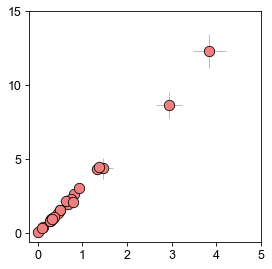

In [178]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
x_values = lch4['lch4_no_mean']*10**3
y_values = lch4['ch3o2_mean']*10**(-6)
x_errors = lch4['lch4_no_ste']*10**3
y_errors = lch4['ch3o2_ste']*10**(-6)


#plt.scatter(x_values, y_values, c='red', s=50, marker='o', linewidths=0.75, edgecolors='black')
plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='lightcoral', mec='black', alpha=1, ms=10, mew=0.75)

plt.yticks([0, 5, 10, 15], fontsize=12)
plt.xticks([0, 1, 2, 3, 4, 5], fontsize=12)

#### 2. L(CO)/[NO] and HO${_2}$

In [136]:
data['lossco_no'] = data['lossco']/data['no']

In [123]:
lco_no_region_mean = data.groupby(['region']).mean()['lossco_no']
lco_no_region_std = data.groupby(['region']).std()['lossco_no']
lco_no_region_ct = data.groupby(['region']).count()['lossco_no']
lco_no_region_ste = lco_no_region_std/np.sqrt(lco_no_region_ct/5)

ho2_region_mean = data.groupby(['region']).mean()['ho2_mole']
ho2_region_std = data.groupby(['region']).std()['ho2_mole']
ho2_region_ct = data.groupby(['region']).count()['ho2_mole']
ho2_region_ste = ho2_region_std/np.sqrt(ho2_region_ct/5)

In [124]:
lco = pd.DataFrame()
lco['lco_no_mean'] = lco_no_region_mean
lco['lco_no_ste'] = lco_no_region_ste
lco['ho2_mean'] = ho2_region_mean
lco['ho2_ste'] = ho2_region_ste

In [125]:
mod = LinearRegression()
X = lco[['lco_no_mean']]*10**3
y = lco['ho2_mean']*10**(-7)
mod.fit(X,y)
print(mod.coef_)
print(mod.intercept_)
y_pred = mod.predict(X)
print(r2_score(y_pred, y))

[0.64167217]
-0.08757746600233252
0.9896650414472439


([<matplotlib.axis.XTick at 0x7f99e1c5bb50>,
 [Text(0, 0, '0'),
  Text(2, 0, '2'),
  Text(4, 0, '4'),
  Text(6, 0, '6'),
  Text(8, 0, '8'),
  Text(10, 0, '10')])

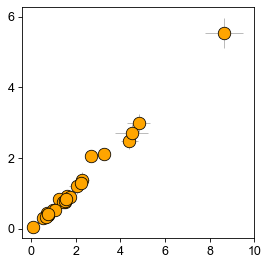

In [132]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
x_values = lco['lco_no_mean']*10**3
y_values = lco['ho2_mean']*10**(-7)
x_errors = lco['lco_no_ste']*10**3
y_errors = lco['ho2_ste']*10**(-7)

#plt.scatter(x_values, y_values, c='red', s=50, marker='o', linewidths=0.75, edgecolors='black')
plt.errorbar(x_values, y_values, xerr=x_errors, yerr=y_errors, 
             fmt="o", ecolor="grey", elinewidth=0.5, capsize=None, mfc='orange', mec='black', ms=12, alpha=1, mew=0.75)

plt.yticks([0, 2, 4, 6], fontsize=12)
plt.xticks([0, 2, 4, 6, 8, 10], fontsize=12)